# Python for Psychologists - Session 7

## handling dataframes

From session 3, we are already familiar with handling data in **pandas** and how to create dataframes from scratch. However, most of the time, we don´t create our dataframe on our own, but rather get a table (i.e. a .xls or .csv or .txt) with data. Today we want to cover some basic steps from reading, cleaning and processing data.

In [1]:
import pandas as pd 

To load and read an existing datasheet into a dataframe we can e.g. use ```pd.read_csv("folderstructure/folder/file.csv")``` . Keep in mind, that ```pd.read``` has more options to read in datafiles! Depending on your datafile, you also need to specify the *file seperator* that separates your values within your datasheet.

Let´s load and read the **results1.csv** file from your data directory using
- ```pd.read_csv("file", sep= "\t")```
- ```pd.read_csv("file", sep= ",")```


In [2]:
df = pd.read_csv("/Users/Dominik/Documents/daten_python/results1.csv", sep="\t")
df.head()

,"vpn_number,trial,condition,correct_key,key,rt"
0,"1,0,pictures,l,s,1.60121011734"
1,"1,1,pictures,l,l,0.809813022614"
2,"1,2,pictures,l,l,0.624212026596"
3,"1,3,pictures,l,l,0.53791308403"
4,"1,4,words,s,s,0.536463975906"


In [3]:
df = pd.read_csv("/Users/Dominik/Documents/daten_python/results1.csv", sep=",") # load dataframe, try diff sep.
df.head()

,vpn_number,trial,condition,correct_key,key,rt
0,1,0,pictures,l,s,1.601210
1,1,1,pictures,l,l,0.809813
2,1,2,pictures,l,l,0.624212
3,1,3,pictures,l,l,0.537913
4,1,4,words,s,s,0.536464


With ```dataframe.head() ``` we can easily get a quick first glance of the first five rows of our dataframe, however, we can adjust this value by simply indicating another number in the parentheses.

In [ ]:
df.head(6)

If you want to display the whole dataframe, you usually end up with a section of your rows or columns, as pandas masks some of them by default. By using ```pd.options.display.max_rows/columns``` we can check the default value and, if needed adjust it with ```pd.options.set.max_rows/columns=int```

In [4]:
pd.options.display.max_rows

60

In [5]:
pd.set_option('display.max_rows', 150)


In [6]:
df

,vpn_number,trial,condition,correct_key,key,rt
0,1,0,pictures,l,s,1.601210
1,1,1,pictures,l,l,0.809813
2,1,2,pictures,l,l,0.624212
3,1,3,pictures,l,l,0.537913
4,1,4,words,s,s,0.536464
5,1,5,words,s,l,0.468966
6,1,6,words,s,s,1.797997
7,1,7,words,s,s,0.455532
8,1,8,pictures,l,l,0.630597
9,1,9,words,s,s,0.635549


As you can see, our dataframe only contains reaction times from a single participant. If we are not super duber interested in single-case studies, this is usually not the type of data we are handling. Most often, especially after conducting an experiment we usually (&hopefully) got data from more than 1 subject stored on our disk.



Most of the time your data is somewhere stored on your disk, to interact with our operating system in jupyter notebook, we can use:

In [7]:
import os

As already mentioned above, we usually end up with more than one datafile from different subjects. 

To check e.g. for files in a given directory, we can use ```os.listdir("directory")```

In [9]:
source = os.listdir("/Users/Dominik/Documents/daten_python")[1:] ### the ds_store file is special to iOS
source

['results8.csv',
 'results1.csv',
 'results2.csv',
 'results3.csv',
 'results7.csv',
 'results6.csv',
 'results4.csv',
 'results5.csv']

In our easy example, we got data from 8 different participants. Conveniently, all our files are named in the same way, i.e. result**number**.csv 

To load the datafile from each subject iteratevily, we could do something like this:

In [5]:
logfile = "/Users/Dominik/Documents/daten_python/results{}.csv" #create a blank file directory with {} 
logfile

'/Users/Dominik/Documents/daten_python/results{}.csv'

We can use ```some_string{}.format``` to format our string by filling in the placeholder {} with a value, either fixed or in an iteratevily manner.

Lets see with a single string how it works:

In [14]:
"hall{}".format("o")

'hallo'

Or with a whole sentence:

In [13]:
"Hallo {}, mein Name ist {}".format("Eva","Dominik")

'Hallo Eva, mein Name ist Dominik'

Let´s load the datasheet of each subject and combine it to one single dataframe:

In [6]:
subj = list(range(1,9))               # create a subject list 
             

all_dfs = [] # create an empty list for all dataframes

for subj in subj:
    file = logfile.format(subj) # we use the blank directory and .format to fill in the subject per for circle 
    df = pd.read_csv(file) # read/load the file and create a dataframe
    all_dfs.append(df) # append each subjects dataframe to the list 
df = pd.concat(all_dfs) # use pandas concatenate to create one final dataframe with all subjects 

Or, we could do something like this, which might be a bit more handy 

In [ ]:
path = "/Users/Dominik/Documents/daten_python/" 

all_dfs = []
for i in source:
    df = pd.read_csv(path+i)
    all_dfs.append(df)
df = pd.concat(all_dfs)

In [17]:
source

['results8.csv',
 'results1.csv',
 'results2.csv',
 'results3.csv',
 'results7.csv',
 'results6.csv',
 'results4.csv',
 'results5.csv']

To get a first idea about your dataframe, its shape, its column names and some first descriptive values, we can use:

- ```dataframe.shape```: contains your rows x columns
- ```dataframe.columns```: contains your column names
- ```dataframe.describe```: contains some basic, descriptive values (e.g. min, max) for numeric values; output depends on your column

Especially ```dataframe.describe()``` gives you a first idea whether there are missing values in your data. However it only works for columns with numeric values.


In [7]:
df.shape

(1200, 6)

In [8]:
df.columns

Index(['vpn_number', 'trial', 'condition', 'correct_key', 'key', 'rt'], dtype='object')

In [9]:
df.describe()

,vpn_number,trial,rt
count,1200.000000,1200.000000,1200.000000
mean,4.500000,74.500000,0.462975
std,2.292243,43.318361,0.142556
min,1.000000,0.000000,0.190987
25%,2.750000,37.000000,0.387352
50%,4.500000,74.500000,0.445858
75%,6.250000,112.000000,0.510286
max,8.000000,149.000000,3.205947


As we can see, the ```dataframe.describe()```function here only resolves columns with numeric values. To get a better idea what other columns contain, we could look for unique values by simply using ```dataframe["some_column"].unique()```

In [10]:
df["condition"].unique()

array(['pictures', 'words'], dtype=object)

To further check for missing values we can use ```dataframe.isnull()``` which returns a dataframe with a boolean statement (i.e. TRUE or FALSE) for each cell. To get a better and comprehensive overview, we just can add ```.sum()``` to see the added missing values per column 

In [11]:
df.isnull().sum()

vpn_number     0
trial          0
condition      0
correct_key    0
key            0
rt             0
dtype: int64

Luckily we don´t have any missing values in our dataframe. However, if you have any in yours, don´t worry, there are ways to either fill or drop missing values 

- ```dataframe.fillna(some value, inplace=True)``` fills missing values with "some value"
- ```dataframe.dropna(axis=0 , how="any")``` drops rows with at least one missing value

Let´s again have a look at our todays example. We have information about the stimulus material, the correct *answer*, the actual button press and the response/reaction time

In [12]:
df.head()

,vpn_number,trial,condition,correct_key,key,rt
0,1,0,pictures,l,s,1.601210
1,1,1,pictures,l,l,0.809813
2,1,2,pictures,l,l,0.624212
3,1,3,pictures,l,l,0.537913
4,1,4,words,s,s,0.536464


From the ```dataframe.describe()```above, we already know, that the mean RT was about 0.46 s - try to recreate the result using the ```.mean()```function and round it two decimals using ```round(some_number, number_of_decimals)```

In [13]:
round(df["rt"].mean(),2)

0.46

Try also to recreate the *min* / *max* / *standard deviation* from the **describe** table

In [14]:
round(df["rt"].min(),2)

0.19

In [15]:
round(df["rt"].max(),2)

3.21

In [16]:
round(df["rt"].std(),2)

0.14

We can see, that mean RT of the experiment and the SD is quite small (under 1s) - let´s try to display any RT above 1 s using ```dataframe.loc``` and a conditional (i.e. boolean) statement as a *potential* outlier

In [17]:
df.loc[df["rt"] > 1.0]

,vpn_number,trial,condition,correct_key,key,rt
0,1,0,pictures,l,s,1.601210
6,1,6,words,s,s,1.797997
7,7,7,pictures,l,l,1.029200
0,8,0,words,s,s,3.205947
1,8,1,words,s,s,1.551911


To visually check if certain values might be an outlier or not, we can use a quick and tbh not very aesthetic vizualisation by using ```dataframe[some_colum].plot(kind="box" or "hist" or "bar" or or or ...)```

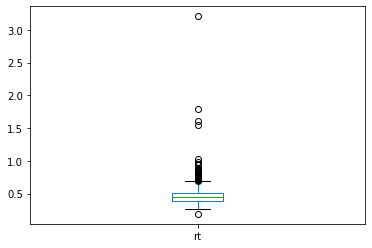

In [19]:
df["rt"].plot(kind="box")

After the RT, let´s investigate the accuracy of our participants. To do so, we need to use the given information in our dataframe.


Let´s create a new column *iscorrect* :

In [20]:
df["iscorrect"] = df["correct_key"] == df["key"] 
df.head()

,vpn_number,trial,condition,correct_key,key,rt,iscorrect
0,1,0,pictures,l,s,1.601210,False
1,1,1,pictures,l,l,0.809813,True
2,1,2,pictures,l,l,0.624212,True
3,1,3,pictures,l,l,0.537913,True
4,1,4,words,s,s,0.536464,True


How can we assess the overall mean accuracy in our experiment? 

Why can we assess it in this way?

In [21]:
df["iscorrect"].mean()

0.985

The overall accuracy is quite high, let´s see how each individual participant has performed. For this we can use ```dataframe.groupby(["some_column"]).method()```to split our dataframe, apply a function and combine the results

In [22]:
accuracy = df.groupby("vpn_number").mean()["iscorrect"]
accuracy

vpn_number
1    0.980000
2    0.980000
3    0.993333
4    0.973333
5    0.993333
6    0.973333
7    0.993333
8    0.993333
Name: iscorrect, dtype: float64

Now we would like to add the accuracy from our aggregated dataframe back to our "non-aggregated" dataframe. For this purpose we need a list that matches the length of our original dataframe

For this purpose we can use a list comprehension:

In [45]:
acc_list=[]

acc_list = [accuracy[vpn] for vpn in df["vpn_number"]]

df["accuracy"] = acc_list    

df.head() 

,vpn_number,trial,condition,correct_key,key,rt,iscorrect,accuracy,error_rate
0,1,0,pictures,l,s,1.601210,False,0.98,0.02
1,1,1,pictures,l,l,0.809813,True,0.98,0.02
2,1,2,pictures,l,l,0.624212,True,0.98,0.02
3,1,3,pictures,l,l,0.537913,True,0.98,0.02
4,1,4,words,s,s,0.536464,True,0.98,0.02


But also a for loop:

In [23]:
acc_list=[]

for vpn in df["vpn_number"]:
    acc_list.append(accuracy[vpn])
    
df["accuracy"] = acc_list    
    
df.head()    

,vpn_number,trial,condition,correct_key,key,rt,iscorrect,accuracy
0,1,0,pictures,l,s,1.601210,False,0.98
1,1,1,pictures,l,l,0.809813,True,0.98
2,1,2,pictures,l,l,0.624212,True,0.98
3,1,3,pictures,l,l,0.537913,True,0.98
4,1,4,words,s,s,0.536464,True,0.98


Try to add the error rate as simple as possible

In [24]:
df["error_rate"] = 1 - df["accuracy"]
df.head()

,vpn_number,trial,condition,correct_key,key,rt,iscorrect,accuracy,error_rate
0,1,0,pictures,l,s,1.601210,False,0.98,0.02
1,1,1,pictures,l,l,0.809813,True,0.98,0.02
2,1,2,pictures,l,l,0.624212,True,0.98,0.02
3,1,3,pictures,l,l,0.537913,True,0.98,0.02
4,1,4,words,s,s,0.536464,True,0.98,0.02


Let´s see whether the RT differs between correct and false responses:

In [25]:
df.groupby("iscorrect").mean()["rt"]

iscorrect
False    0.518537
True     0.462129
Name: rt, dtype: float64

Since we already know that there is more than one correct way, let´s try to investigate the RT differences between correct and false responses by creating two new dataframes (i.e. df_corr and df_incorr) using ```dataframe.loc```

In [38]:
df_corr = df.loc[df["iscorrect"]==True]
df_incorr = df.loc[df["iscorrect"]==False]

In [37]:
print(df_corr["rt"].mean())
print(round(df_incorr["rt"].mean(),2))

0.46212875036218054
0.52


We could also combine different statemens and e.g. group our dataframe by subjects and evaluate only the mean RT for correct trials. We can do this by using ```df.loc```+ ```df.groupby```

In [26]:
mean_rt_corr_trials= df.loc[df["iscorrect"] == True].groupby("vpn_number").mean()["rt"]
mean_rt_corr_trials

vpn_number
1    0.486054
2    0.442389
3    0.432657
4    0.431253
5    0.435789
6    0.465716
7    0.430042
8    0.572637
Name: rt, dtype: float64

In [27]:
mean_rt_incorr_trials=df.loc[df["iscorrect"] == False].groupby("vpn_number").mean()["rt"]
mean_rt_incorr_trials

vpn_number
1    0.877357
2    0.340185
3    0.461866
4    0.438650
5    0.540642
6    0.428457
7    0.647508
8    0.562604
Name: rt, dtype: float64

Let´s visualize the our RT, but only for correct trials:

In [39]:
import seaborn as sns

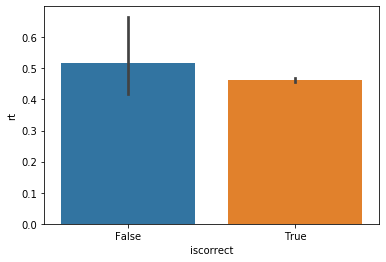

In [40]:
sns.barplot(x="iscorrect", y="rt", data=df)

To further specify our plot, we can use set the hue (i.e. color coding in seaborn) to *condition*

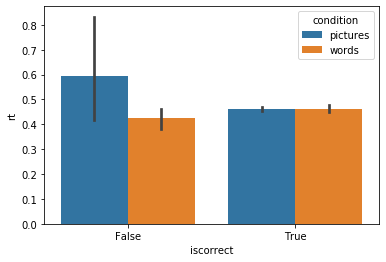

In [41]:
sns.barplot(x="iscorrect", y="rt", hue="condition", data=df)

The visualization suggests that there is no difference between RT_correct and RT_incorrect. However, for educational purposes only, let´s calculate a paired t-test.

Most statistics are covered in **stats** from the **scipy** module

In [42]:
from scipy import stats

In [43]:
stats.ttest_rel(mean_rt_incorr_trials, mean_rt_corr_trials)

Ttest_relResult(statistic=1.327678033605088, pvalue=0.22594261344288613)

In [44]:
stats.pearsonr(mean_rt_incorr_trials, mean_rt_corr_trials)

(0.2817824476045179, 0.4989590990286351)

To save your new dataframe, you can use

```pd.save("location_on_disk", potential settings, such as, sep=) ```

In [51]:
df.to_csv("/Users/Dominik/Documents/daten_python/final.csv", sep=",")